In [2]:
# mnist (benchmark) dataset

# It is a dataset of handwritten images

# http://yann.lecun.com/exdb/mnist/


# The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, 
# and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been
# size-normalized and centered in a fixed-size image.

# It is a good database for people who want to try learning techniques and pattern recognition methods on real-world 
# data while spending minimal efforts on preprocessing and formatting.'''


In [4]:
!pip install keras

In [5]:
import numpy as np 
import tensorflow as tf
import keras  
from keras.datasets import mnist 
from keras.models import Model 
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten 
from keras import backend as k 

In [6]:
# If we load it, it is going to return tuple of NumPy Arrays
(x_train, y_train), (x_test, y_test) = mnist.load_data()  

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
# Display the dataset
#we are storing 60k images with 28 by 28 pixels in grayscale format (60000, 28, 28)
# y_train contain NumPy array of digit labels (integers in range 0-9) with shape (60000,) 
#we need to reshape it for further operations on it as Deep learning neural networks require that image data be provided as three-dimensional arrays



print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))  
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape)) 

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [ ]:
#There are two ways to represent the image data as a three dimensional array. The first involves having the channels as the last or third dimension in the 
#array. This is called “channels last“. The second involves having the channels as the first dimension in the array, called “channels first“.
#TensorFlow: Channels last order.
#Theano: Channels first order.
#CNTK: Channels last order.

#Channels Last. Image data is represented in a three-dimensional array where the last channel represents the color channels, e.g. [rows][cols][channels].
#Channels First. Image data is represented in a three-dimensional array where the first channel represents the color channels, e.g. [channels][rows][cols].

#Since output of the model can comprise of any of the digits between 0 to 9.so, we need 10 classes in output. 
#To make output for 10 classes, use keras.utils.to_categorical function, which will provide with the 10 columns. 
#Out of these 10 columns only one value will be one and rest 9 will be zero and this one value of the output will denote the class of the digit.

In [8]:
#Some image processing and deep learning libraries prefer channels first ordering, and some prefer channels last.
img_rows, img_cols=28, 28
  
if k.image_data_format() == 'channels_first': 
  #reshape dataset to have a single channel
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)  # 1 represents grayscale and 3 will represent colored image
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols) 
   inpx = (1, img_rows, img_cols) 
else:
  #reshape dataset to have a single channel
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)  # same here also
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) 
   inpx = (img_rows, img_cols, 1)

In [9]:
#convert from integers to floats
#the whole math for neural networks is continuous, not discrete, and this is best approximated with floating point numbers. The inputs, outputs, and 
#weights of a neural network are continuous numbers.
#If we had integer outputs, they will still be converted to floating point at some point in the pipeline, in order to have compatible types where operations
#can be made. This might happen explicitly or implicitly, its better to be explicit about types.


x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 

# Nor. 0 to 1
#We scale features to make them all of the same magnitude (i.e. importance or weight).
#You scale features to speed up execution time types = standard, minamx'''


x_train /= 255
x_test /= 255

In [10]:
# convert class vectors to binary class matrices  OR one hot encode target values
#from keras.utils import to_categorical
# first I need import tensorflow and then I can call to_categorical method!


import tensorflow as tf
from tensorflow.keras.utils import to_categorical
y_train = tf.keras.utils.to_categorical(y_train) 
y_test = tf.keras.utils.to_categorical(y_test) 



#we need to convert our dataset into categorical format (and hence one-hot encoded format), we can do so using Scikit-learn’s OneHotEncoder module. 
#However, TensorFlow also offers its own implementation: tensorflow.keras.utils.to_categorical. It’s a utility function which allows us to convert 
#integer targets into categorical and hence one-hot encoded ones.

#if y_train[index] = 1 then before applying to_categorical y_train[index].shape = () and after applying the method it will give y_train[index]
#and y_train[index].shape [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
#(10,)  respectively

In [11]:
# Creating three layers convolution and pooling
inpx = Input(shape=inpx) 
#layer1 is Conv2d layer which convolves the image using 32 filters each of size (3*3).
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx) 

#layer2 is again a Conv2D layer which is also used to convolve the image and is using 64 filters each of size (3*3).
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1) 

#layer3 is MaxPooling2D layer which picks the max value out of a matrix of size (3*3).
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2) 

# To prevent overfitting layer4 is showing Dropout at a rate of 0.5
layer4 = Dropout(0.5)(layer3)

#layer5 is flattening the output obtained from layer4 and this flatten output is passed to layer6.
layer5 = Flatten()(layer4) 

#layer6 is a hidden layer of neural network containng 250 neurons
layer6 = Dense(250, activation='sigmoid')(layer5) 

#layer7 is the output layer having 10 neurons for 10 classes of output that is using the softmax function
layer7 = Dense(10, activation='softmax')(layer6) 

In [15]:
# Here we are calling the compiler and fit function 
# here we use Adadelta optimizer

model = Model([inpx], layer7) 
model.compile(optimizer=tf.keras.optimizers.Adadelta(), 
              loss=tf.keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20, batch_size=100) 

Epoch 1/20
600/600 [==============================] - 8s 12ms/step - loss: 0.6283 - accuracy: 0.8310
Epoch 2/20
600/600 [==============================] - 7s 12ms/step - loss: 0.6180 - accuracy: 0.8334
Epoch 3/20
600/600 [==============================] - 7s 12ms/step - loss: 0.6086 - accuracy: 0.8357
Epoch 4/20
600/600 [==============================] - 7s 12ms/step - loss: 0.5998 - accuracy: 0.8373
Epoch 5/20
600/600 [==============================] - 7s 12ms/step - loss: 0.5926 - accuracy: 0.8378
Epoch 6/20
600/600 [==============================] - 7s 12ms/step - loss: 0.5836 - accuracy: 0.8392
Epoch 7/20
600/600 [==============================] - 7s 12ms/step - loss: 0.5773 - accuracy: 0.8410
Epoch 8/20
600/600 [==============================] - 7s 12ms/step - loss: 0.5704 - accuracy: 0.8431
Epoch 9/20
600/600 [==============================] - 7s 12ms/step - loss: 0.5616 - accuracy: 0.8458
Epoch 10/20
600/600 [==============================] - 7s 12ms/step - loss: 0.5568 - accura

In [16]:
score = model.evaluate(x_test, y_test, verbose=1) #model.evaluate provide score for the data
print('loss=', score[0]) 
print('accuracy=', score[1])


313/313 [==============================] - 1s 4ms/step - loss: 0.3937 - accuracy: 0.8907
loss= 0.3936682939529419
accuracy= 0.8906999826431274


In [17]:
#sinle Value predication in number
predictions = model.predict(x_test)
print(np.argmax(np.round(predictions[3])))


0


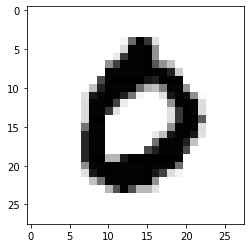

In [18]:
#sinle Value predication in graph (plot)
import matplotlib.pyplot as plt
plt.imshow(x_test[3].reshape(28, 28), cmap = plt.cm.binary)
plt.show()


In [19]:
########################################################################## THE END ######################################################################